# Seaborn | Part-4: Seaborn Color Palettes

Color is an utmost important aspect of figure styling because it reveals pattern in the data if used effectively; or hide those patterns if used poorly. Even professionals often assume usage of color to portray data as a solved problem. They just pick a palette from a drop-down menu (probably either a grayscale ramp or a rainbow), set start and end points & finally press apply. But it isn't that simple and thus many visualizations fail to represent the underlying data as appropriately as they could.

Primary objective with choice of color is to illuminate datapoints that are concealed in huge datasets. Quoting Robert Simmon:
>Although the basics are straightforward, a number of issue complicate color choices in visualization. Among them:
The relationship between the light we see and the colors we perceive is extremely complicated.
There are multiple types of data, each suited to a different color scheme.
A significant number of people (mostly men), are color blind.
Arbitrary color choices can be confusing for viewers unfamiliar with a data set.
Light colors on a dark field are perceived differently than dark colors on a bright field, which can complicate some visualization tasks, such as target detection.

One of the most fundamental and important aspects of color selection is the mapping of numbers to colors. This mapping allows us to pseudocolor an image or object based on varying numerical data. By far, the most common color map used in scientific visualization is the *rainbow* color map. Research paper on [Diverging Color Maps for Scientific Visualization](https://cfwebprod.sandia.gov/cfdocs/CompResearch/docs/ColorMapsExpanded.pdf) by Kenneth Moreland very well deals with the extended color concepts, if the topic interests you for further analysis.

With all that been said, let us now focus on what Seaborn has to offer BUT before doing that let me once again remind you that Seaborn runs on top of Matplotlib so any color that is supported by [Matplotlib](https://matplotlib.org/users/colors.html) will be supported by Seaborn as well. So at first, let us understand what Matplotlib has to offer:
 - an RGB or RGBA tuple of float values in [0, 1] (e.g., (0.1, 0.2, 0.5) or (0.1, 0.2, 0.5, 0.3))
 - a hex RGB or RGBA string (e.g., '#0F0F0F' or '#0F0F0F0F')
 - a string representation of a float value in [0, 1] inclusive for gray level (e.g., '0.5')
 - one of {'b', 'g', 'r', 'c', 'm', 'y', 'k', 'w'}
 - a X11/CSS4 color name
 - a name from the xkcd color survey prefixed with 'xkcd:' (e.g., 'xkcd:sky blue')
 - one of {'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'}
 - one of {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'} which are the [Tableau](https://onlinehelp.tableau.com/current/pro/desktop/en-us/viewparts_marks_markproperties_color.html) Colors from the ‘T10’ categorical palette (which is the default color cycle).

Note that all string specifications of color, other than "CN", are NOT case-sensitive. Let us briefly go through a couple of common supported colors here:
 - RGB/RGBA tuples are 4-tuples where the respective tuple components represent Red, Green, Blue, and Alpha (opacity) values for a color. Each value is a floating point number between 0.0 and 1.0. For example, the tuple (1, 0, 0, 1) represents an opaque red, while (0, 1, 0, 0.5) represents a half transparent green.
 - This is actually another way of representing RGBA codes and common Color Conversion Calculators can be used to translate values. Here is a [Hex to RGBA](http://hex2rgba.devoth.com/) and [RGB to Hex](https://www.w3schools.com/colors/colors_converter.asp) Color converter for your future assistance.
 - Dictionary of values from {'C0', 'C1', 'C2', 'C3', 'C4', 'C5', 'C6', 'C7', 'C8', 'C9'} represent [Color Quantization](https://books.google.co.in/books?id=CsjSBwAAQBAJ&pg=PA128&lpg=PA128&dq=What+are+%7B%27C0%27,+%27C1%27,+%27C2%27,+%27C3%27,+%27C4%27,+%27C5%27,+%27C6%27,+%27C7%27,+%27C8%27,+%27C9%27%7D+colors?&source=bl&ots=yk_q-tl53W&sig=Xg5F2P_Evs-YnUNr0wpaiZT7uUU&hl=en&sa=X&ved=0ahUKEwipy_WagonaAhUML48KHZu6Dq4Q6AEIPTAC#v=onepage&q=What%20are%20%7B'C0'%2C%20'C1'%2C%20'C2'%2C%20'C3'%2C%20'C4'%2C%20'C5'%2C%20'C6'%2C%20'C7'%2C%20'C8'%2C%20'C9'%7D%20colors%3F&f=false). I have attached a link in the provided notebook that shall guide you to an online book where on Page-29 you could find specifics.

My sole purpose of keeping you posted of Matplotlib background every now and then is only to ensure that when you get to production-level and try to customize a plot as per your analysis, you should know what is ACTUALLY running in the background. This shall empower you to accordingly tweak parameters here and there. Let us now look into few Seaborn options for colors:

In [1]:
# Importing required Libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Setting a figure size for all the plots we shall be drawing in this kernel:
sns.set(rc={"figure.figsize": (6, 6)})

## Building color palettes:

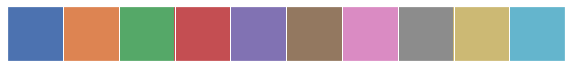

In [2]:
current_palette = sns.color_palette()
sns.palplot(current_palette)

The most important function for working with discrete color palettes is `color_palette()`. This function provides an interface to many (though not all) of the possible ways you can generate colors in seaborn, and it’s used internally by any function that has a `palette` argument (and in some cases for a `color` argument when multiple colors are needed).

`color_palette()` will accept the name of any seaborn palette or matplotlib colormap (except `jet`, which you should never use). It can also take a list of colors specified in any valid matplotlib format (RGB tuples, hex color codes, or HTML color names). The return value is always a list of RGB tuples.

Finally, calling `color_palette()` with no arguments will return the current default color cycle.

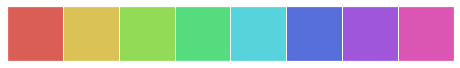

In [3]:
sns.palplot(sns.color_palette("hls", 8))

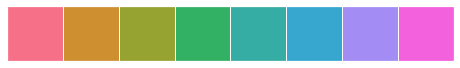

In [4]:
sns.palplot(sns.color_palette("husl", 8))

Let me explain these Qualitative (or categorical) palettes. These are best when you want to distinguish discrete chunks of data that do not have an inherent ordering. Ideally, when importing Seaborn, the default color cycle is changed to a set of six colors that evoke the standard matplotlib color cycle. But when we have more than 6, say 8 categories in our data to distinguish, then the most common way is using `hls` color space, which is a simple transformation of *RGB* values.

Then there is also `hls_palette()` function that lets you control the *lightness* and *saturation* of colors.

All of it displayed above is just the basic Seaborn aesthetics. Let us now look at *xkcd_rgb* dictionary that has 954 colors in it. Let us try to pull a few out of it:

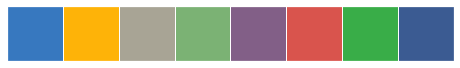

In [7]:
sample_colors = ["windows blue", "amber", "greyish", "faded green", "dusty purple", "pale red", "medium green", "denim blue"]
sns.palplot(sns.xkcd_palette(sample_colors))

Other style is `cubehelix` color palette that makes sequential palettes with a linear increase or decrease in brightness and some variation in [hue](https://en.wikipedia.org/wiki/Hue). Actually let us plot this color palette in a Density contour plot:

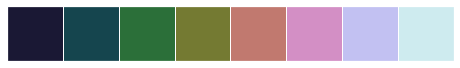

In [8]:
# Default Matplotlib Cubehelix version:
sns.palplot(sns.color_palette("cubehelix", 8))

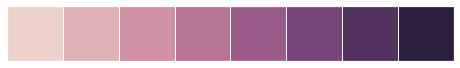

In [9]:
# Default Seaborn Cubehelix version:
sns.palplot(sns.cubehelix_palette(8))

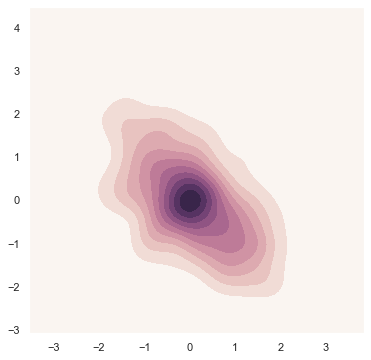

In [10]:
# Density Plot with Seaborn defaults:
x, y = np.random.multivariate_normal([0, 0], [[1, -.5], [-.5, 1]], size=300).T

sample_cmap = sns.cubehelix_palette(light=1, as_cmap=True)
sns.kdeplot(x, y, cmap=sample_cmap, shade=True)

## Interactive widget to create a sequential cubehelix palette:

Let us now play with the parameters to have some fun and choose best parameters:

In [11]:
sns.choose_cubehelix_palette(as_cmap=True)

interactive(children=(IntSlider(value=9, description='n_colors', max=16, min=2), FloatSlider(value=0.0, descri…

Note that this app only works in this Jupyter Notebook as of now to help choose best parameters for our plot:

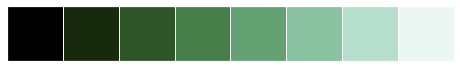

In [12]:
sns.palplot(sns.cubehelix_palette(n_colors=8, start=1.7, rot=0.2, dark=0, light=.95, reverse=True))

*start* is always between 0 and 3. *rot* an abbreviation for rotation is kept between -1 and 1. *reverse* converses the color ordering and *hue* refers to plot appearance.

## Generic Seaborn Plots:

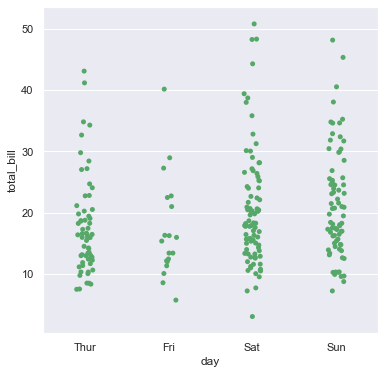

In [13]:
# Loading up built-in dataset:
tips = sns.load_dataset("tips")

# Creating Strip plot for day-wise revenue:
sns.stripplot(x="day", y="total_bill", data=tips, color="g")

This does the job for us but let us try to get better results by plotting each day in different color instead of same color. For this, we shall replace `color` parameter with `palette` parameter:

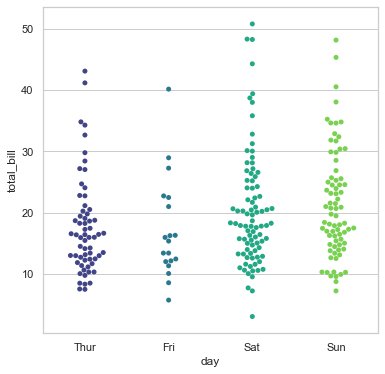

In [15]:
# Set Theme:
sns.set_style('whitegrid')

# Creating Strip plot for day-wise revenue:
sns.swarmplot(x="day", y="total_bill", data=tips, palette="viridis")

Similarly, let us plot one more and for a change, this time we shall plot a Violin plot:

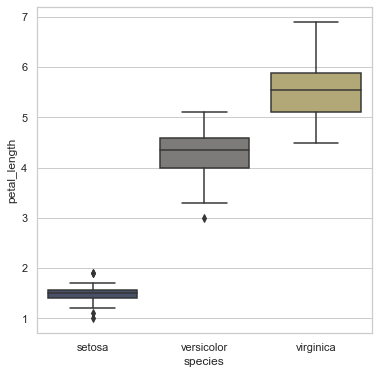

In [17]:
iris = sns.load_dataset("iris")

sns.boxplot(x="species", y="petal_length", data=iris, palette="cividis")

There are multiple such palette available for us to play around with like magma, warm grey, gunmetal, dusky blue, cool blue, deep teal, viridian, twilight blue and many more. For customized color brewing, we may also use *color brewer* that also offers interesting color palettes for working with Qualitative data. The cool thing about it is that you can use the an interactive Ipython widget function to make the selection of the palette. For this, you only need to use `choose_colorbrewer_palette()`.

There are multiple such palette available for us to play around with like magma, warm grey, gunmetal, dusky blue, cool blue, deep teal, viridian, twilight blue and many more. For customized color brewing, we may also use *color brewer* that also offers interesting color palettes for working with Qualitative data. A nice feature of the [Color Brewer website](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) is that it provides some guidance on which palettes are color blind safe. 

The cool thing about it is that you can use the an interactive Ipython widget function to make the selection of the palette. For this, you only need to use `choose_colorbrewer_palette()`. To access this on your web browser, please access [ColorBrewer](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3) link provided in the notebook.

I also found a nice representation of Color Schemes in Seaborn, that I found somewhere on web, so thought of sharing it in your Resource bucket to check out if you wish to. Let's have a look at it (from the folder)::: This depicts the color style in which assigning is done for different features based on either **Sequential**, **Diverging** or **Qualitative**.

With that we end this lecture and in the next one we shall start drilling one by one into the commonly used Seaborn plots. Till then, Enjoy Visualizing!